In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Day 04 - MATH/PHYS 241

To solve many problems of interest, we will need to utilize numerical techniques. Numerical analysis is itself a course of study, so we will only be touching on a few basic techniques and applying them as we move forward.

In principle, the idea is to perform complicated mathematics in a way that utilizes the computers strength (computation) to our advantage.

Sometimes this means manually calculating an integral that has no defined solution.

Sometimes this means randomly selecting data from a sample set to bootstrap a mean and varance (more on this to come!).

Computers are particularly good at [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra). We will go over some basics of linear algebra and perform some simple calculations to gain a better understanding of how these calculations work so we can better appreciate how curve fitting works, particularly, the method of [linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares).

[Relavent xkcd](https://xkcd.com/2048/):

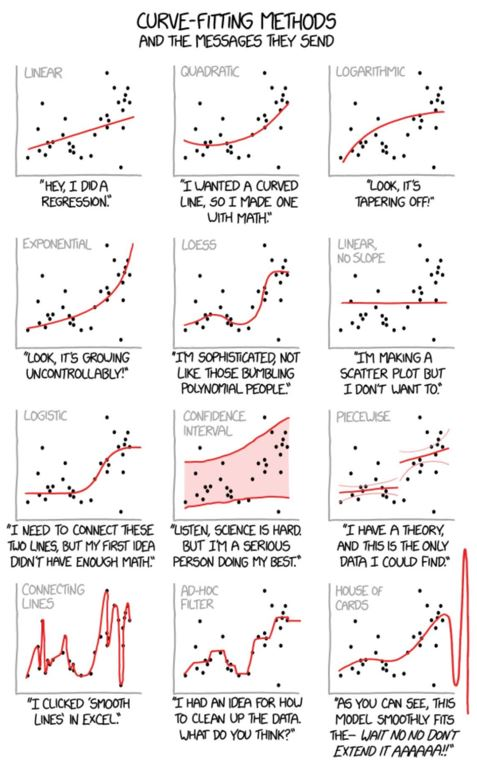

# **Matrix Definitions**

A matrix is a table or array of numbers or algebraic variables arranged in rows and columns such as this table for matrix $\textbf{A}$:

$$\textbf{A}=
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3}\\
a_{2,1} & a_{2,2} & a_{2,3}\\
a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix} \tag{1}
$$

Matrices are usually denoted in bold. The elements or entries in the matrix are usually denoted by indices reflecting the row and column of the entry, with the row number
first. A matrix such as equation above having three rows and three columns is said to be a 3 by 3, or 3 $\times$ 3, matrix.

If the number of rows and columns is equal, then the matrix is said to be square. Let the number of rows be $m$ and the number of columns be $n$. Then if $m$ = 3 and $n$ = 1, such as:

$$\textbf{u}=
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} \tag{2}
$$

Where matrix $\textbf{u}$ is said to be a column matrix or column vector.

Remember however, if we want to use matrix algebra in Python, we need to include the numpy library in our script!  

# **Addition and Multiplication**

Matrices can be added or subtracted only if their number of rows and number of columns is identical, in which case corresponding entries are added or subtracted.

Two matrices $\textbf{A}$ and $\textbf{B}$ can be multiplied only if the number of columns of $\textbf{A}$ is equal to the number of rows of $\textbf{B}$.

For example, if matrix $\textbf{A}$ has size $m$ by $n$, then it may premultiply a matrix $\textbf{B}$ with size $n$ by $q$, in which case the product matrix $\textbf{C}$ = $\textbf{AB}$ will be size $m$ by $q$.

<font color = orange>
To multiply two arrays in python using numpy, we need to use the following command:

`np.matmul(A, B)`
</font>

In component form, this multiplication takes the form:

$$
C_{ij} = \sum_{k=1}^{n}a_{ik}b_{kj} \tag{3}
$$

A scalar multiplies a matrix by multiplying each entry. Likewise,
differentiation of a matrix is done on each element.

# **Identity and Determinant**

A diagonal matrix is a square matrix in which $a_{ij}= 0$ if $i$ does not equal $j$. For example, this is a special diagonal matrix called the identity matrix $\textbf{I}$:

$$\textbf{I}=
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix} \tag{4}
$$

The transpose of a matrix (let's call it matrix $\textbf{B}$), denoted by $\textbf{B}^{\textrm{T}}$, is obtained by reflecting the entries about the diagonal
from upper left to lower right.

The inverse of a square matrix $\textbf{A}$ is denoted as $\textbf{A}^{-1}$ and defined such that:

$$
\textbf{A}^{-1}\textbf{A} =
\textbf{A}\textbf{A}^{-1} =
\textbf{I} \tag{5}
$$

A matrix is invertible if and only if
its determinant is nonzero.

<font color = orange>
In Python using numpy, we can find the inverse of our matrix using:

`np.linalg.inv(A)`
</font>

The determinant is a special
number that can be computed for any square matrix $\textbf{A}$ and is denoted $\textrm{det}(\textbf{A})$ or $\mid\textbf{A}\mid$.

Computing the determinant depends upon the dimensions of the matrix. For example, the determinant of the 3 $\times$ 3 matrix:

$$\textbf{A}=
\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix} \tag{6}
$$

is given by:

$$
\textrm{det}(\textbf{A}) = aei - afh + bfg - bdi + cdh - ceg \tag{7}
$$

<font color = orange>
In Python with numpy, we can find the determinant by using:

`np.linalg.det(A)`
</font>

# **Solution of a Linear System of Equations**

Consider a system of $m$ algebraic equations and $n$ unknowns:

$$
\begin{matrix}
a_{11}x_{1} + a_{12}x_{2} + ... + a_{1n}x_{n} = b_{1} \\
a_{21}x_{1} + a_{22}x_{2} + ... + a_{2n}x_{n} = b_{2} \\
. \\
. \\
a_{n1}x_{1} + a_{n2}x_{2} + ... + a_{nn}x_{n} = b_{n}
\end{matrix} \tag{8}
$$

Using the rules noted above, one can write this system of
equations in the compact notation of matrix algebra as:

$$
\begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
... & ... & ...& ...\\
a_{n1} & a_{n2} & ... & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_{1}\\
x_{2}\\
... \\
x_{n}
\end{bmatrix}=\begin{bmatrix}
b_{1}\\
b_{2}\\
... \\
b_{n}
\end{bmatrix} \tag{9}
$$

or, in simple matrix notation:

$$
\textbf{A}\textrm{x} = \textrm{b} \tag{10}
$$

Usually, we want to solve for the column vector $\textrm{x}$ of unknowns. Because it will always be the case that $m$ = $n$ in
these systems, we can use the definition of our inverse square matrix equation to obtain:

$$
\textbf{A}^{-1}\textbf{A}\textrm{x} =
\textbf{A}^{-1}\textrm{b} \tag{11}
$$

or,

$$
\textrm{x} = \textbf{A}^{-1}\textrm{b} \tag{12}
$$

## **Class Problem 1**

Consider the set of equations:

$$
\begin{align}
3x + 2y + 3z &= 0 \\
7x + 6y + 4z &= -2 \\
x + 3y + 2z &= -6
\end{align} \tag{13}
$$

1) Write the set in matrix form $\textbf{A}\textrm{x} = \textrm{b}$.

2) Show that the A matrix is invertible by finding $\textrm{det}(\textbf{A})$ (A is invertible if $\textrm{det}(\textbf{A}) \neq 0$)

3) Use Python to solve the equation set for $x$, $y$, and $z$.

# Model Fitting Data

When we fit a model to data (say, a straight line drawn through a scatter plot), we need some way of knowing how well the model actually fits the data. The way this is done mathematically is by reducing the "distance" between the observations and the model estimate. We therefore want to choose a model that minimizes $\chi^2$:

$$
\begin{align}
\chi^2 = \sum^N_{i=1} \frac{(\hat{y_i} - y_i)^2}{\sigma_i^2} \tag{14}
\end{align}
$$

Where $\hat{y_i}$ is the model estimate at data point $i$, $y_i$ is the observed, and $\sigma_i$ is the uncertainty of the individual measurement ($y_i$).

Note, this is the *chi-squared for a model fit*. In lab 1, we used the *chi-squared for Goodness of Fit*, which uses a different equation. They are *both* chi-squared equations, but are used in different settings and have slightly different forms.

It is important to note that the uncertainty in measurement ($\sigma_i$) may or may not be the same across all measurements in the data set. For example, if we are measuring the pressure at different altitudes using the same instrument, then the uncertainty for each data point is likely the same. However, if we are measuring descrete samples in the lab, each sample can/will have a different uncertainty in measurement. The different uncertainties will then represent a *weighting factor* that will devalue less accurate measurements relative to more accurate measurements.





# Ordinary Least Squares - Fitting a Straight Line

To fit a straight line to our data, we will need to minimize $\chi^2$ when $\hat{y} = a_1 + a_2x_i$, where $a_1$ is the y-intercept and $a_2$ is the slope of the line. This gives:

$$
\begin{align}
\chi^2 = \sum^N_{i=1} \frac{(a_1 + a_2x_i- y_i)^2}{\sigma_i^2} \tag{15}
\end{align}
$$

Where $x_i$ is the independent variable and $y_i$ is the dependent variable. If we assume (or know) that the independent variable is *very* well known ($\sigma_x \approx 0$), then we have a **Type I Regression**.

We want to find the coefficients $a_1$ and $a_2$ such that we minimize $\chi^2$. If you remember optimization from calculus, we can find the values of our coefficients by taking the derivative of our equation with respect to each coefficient, set the equations equal to 0, and solve.

$$
\begin{align}
\frac{\partial \chi^2}{\partial a_1} &= 2 \sum_{i=1}^N \frac{(a_1 + a_2x_i- y_i)}{\sigma_i^2} = 0 \tag{16} \\
\frac{\partial \chi^2}{\partial a_2} &= 2x_i \sum_{i=1}^N \frac{(a_1 + a_2x_i- y_i)}{\sigma_i^2} = 0 \tag{17}
\end{align}
$$

Which will reduce to two equations with two unknowns (the coefficients):

$$
\begin{align}
S a_1 + S_x a_2 &= S_y \tag{18} \\
S_x a_1 +S_{xx} a_2 &= S_{xy} \tag{19}
\end{align}
$$

Where
* $S = \sum^N_{i=1} \frac{1}{\sigma^2_i}$ \\

* $S_x = \sum^N_{i=1} \frac{x_i}{\sigma^2_i}$ \\

* $S_y = \sum^N_{i=1} \frac{y_i}{\sigma^2_i}$ \\

* $S_{xx} = \sum^N_{i=1} \frac{x_i^2}{\sigma^2_i}$ \\

* $S_{xy} = \sum^N_{i=1} \frac{x_i y_i}{\sigma^2_i}$ \\

We can solve these equations using linear algebra by writing out the equations to match the form $\textbf{A}\textrm{x} = \textrm{b}$:

$$
\begin{align}
\begin{bmatrix}
S & S_x \\
S_x & S_{xx}
\end{bmatrix}  
\begin{bmatrix}
a_1 \\
a_2
\end{bmatrix} &=
\begin{bmatrix}
S_y \\
S_{xy}
\end{bmatrix} \tag{20}
\end{align}
$$

Equation 20 is sometimes referred to as the normal equations (as there are assumptions we have made along the way that make our solution valid if and only if the data is scattered normally). Solving for $\textrm{x}$ in equation 20 gives the coefficients we want.

# Linear Fits with Python Libraries

At this point, we have covered a lot of math and you're likely thinking "this seems like a lot of work to add a straight line to my data...", which is a valid point. However, it is important to know how results are produced if you are going to claim they are significant.

And lucky for us, there are a plethora of libraries with fitting functions to choose for any given case. In a way, this is both good and bad. Good, in that we don't need to code up our own solution to find a model fit for our data. Bad, in that it is easy to choose the wrong model if we are not careful.

# Scipy stats.linregress

A good first application to review is the [linregress function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) in scipy stats, which will generally look like:

`result = linregress(x, y)`

The function will calculate the linear regression between two variables ($x, y$) and outpute the slope, intercept, Pearson correlation coefficient (rvalue), p-value of null-hypothesis (slope is 0), the standard error of the slope, and the standard error of the intercept under the assumption the residuals are normally distributed. All of these values are stored in the object `result` and can be called upon using the proper call functions:

`result.slope` \\
`result.intercep` \\
`result.rvalue` \\
`result.pvalue` \\
`result.stderr` \\
`result.intercept_stderr`

## Class Problem 2

Let's say we have a metal rod whose ends are held at different temperatures and we measure the temperature of the rod at specific locations. The data are given below:

In [7]:
# Sample data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # linear coordinate, in cm
y = np.array([14, 18, 36, 30, 59, 60, 62, 79, 99]) # temp in C

1) Using linear algebra, find the slope and intercept of a linear fit to the data.

2) Use scipy.stats to calculate the slope and intercept. It *should* match with your result in 1)

3) Make a scatter plot of the data, with temperature on the y-axis and the linear coordinate on the x-axis.

4) Add the linear fit to the plot.

The final plot should include axis labels, a title, and a legend.

# Confidence Intervals

The plot we just made looks pretty good, but there is something missing that we should include: [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval).

A confidence interval provides a range of values along with a specified confidence level (generally 95%). We will want to include a numeric confidence interval for the slope and y-intercept, then create a visual confidence interval to include in the plot.

To find the numeric values around the slope and intercept, we should first define the standard error based off the variance of the residuals to the linear fit:

$$
\begin{align}
s^2 &= \frac{1}{N-2}\sum^{N}_{i-1}(\hat{y}_i-y_i)^2 \tag{21}
\end{align}
$$

Where $s^2$ is the variance, $N$ is the number of data points we are fitting and -2 comes from the fact we used two degrees of freedom by specifying the slope and y-intercept, $\hat{y}_i$ is the expected value from the linear fit at point $i$, and $y_i$ is the observed value from the data for point $i$.

The residuals should follow a t-distribution if we are applying the linear fit correctly. From this, we can calculate the confidence interval around the slope or y-intercept by finding the critical value for a given confidence level.

We've already covered how to do this in a previous notebook. The code for it is:

`# Defining the critical value from the t-distribution` \
`alpha = 0.05` \
`t_crit = stats.t.ppf(1 - alpha/2, df = n - 2)`

Where we have used the cumulative distribution function in scipy.stats for the t-distribution and set the confidence level at 95% (alpha = 0.05). Note we subtract 2 from the degrees of freedom since we have defined the slope and y-intercept in the equation of the linear fit.

We can now calculate the confidence interval around the slope and y-intercept:

`# Calculate the CI around slope`\
`ci_l_slope = slope - t_crit * result.stderr`\
`ci_u_slope = slope + t_crit * result.stderr`\
\
`# Calculate the CI around y-intercept`\
`ci_l_int = result.intercep - t_crit * result.intercept_stderr`\
`ci_u_int = result.intercep + t_crit * result.intercept_stderr`

Note that the confidence interval depends on the confidence level we choose to set. We should report the confidence interval with our slope and y-intercept values, stating what confidence level the values represent.


## Class Problem 3

Calculate the 95% CI around the slope and y-intercept using the sample data in problem 2, then report the values. Be sure to state in the output what the range of values represents (aka, a 95% CI).

### A Note about Confidence Intervals

There are common misunderstandings regarding the interpretation of confidence intervals. Here is how we *should* interpret the confidence interval:

*If we repeatedly collect new sample data and repeat this analysis on each set of data, then the proportion of calculated 95% confidence intervals that encompassed the true value of the population parameter would tend toward 95%.*

Another way to correctly interpret the confidence interval is that it represents values that are not statistically significantly different from the point estimate at the set critical level. For example, if the slope 95% CI overlaps with 0, then a slope of 0 is not statistically different at the 95% confidence level.  

The following represent ***INCORRECT*** interpretations:
* There is a 95% chance the population parameter lies within the interval.
* 95% of the sample data lie within the interval.
* The parameter estimate of a repeat experiment lies within the confidence interval 95% of the time.

# Plotting a Confidence Interval Band

When we make regression and plot the results, it is helpful to include a confidence interval band around the regression to visually indicate the uncertainty in the model. In a linear regression, this will look like a ribbon around the fit that is narrower in the middle and wider towards the ends.

To make this band, you might think we can just use the min/max values from the confidence intervals around our slope and intercept, but this result suggests the slope and intercept vary independently, which is wrong. Instead, we need to estimate a confidence interval for the mean prediction $\hat{y}$ at each $x$. In equation form, this looks like:

$$
\begin{align}
CI_{\hat{y}_i} &= \hat{y}_i \pm t_{\frac{\alpha}{2},n-2} \cdot s \sqrt{\frac{1}{N} + \frac{(x_i-\bar{x})^2}{\sum_{j=1}^N({x_j-\bar{x})^2}}} \tag{22}
\end{align}
$$

Where:
* $\hat{y}_i$ is the model predicted value at data point $i$
* $t_{\frac{\alpha}{2},n-2}$ is the t-distribution critical value for a set critical level ($\alpha$) and degrees of freedom (implementation discussed in above paragraph)
* $s$ is the square root of the variance of the residuals to the model (see equation 21)
* $N$ is the number of data points
* $\bar{x}$ is the mean of $x$

When the above is implemented correctly, we should be able to use `plt.fillbetween()` function to visually indicate the confidence band around the linear fit model.

## Class Problem 4

Using the data from Class Problem 2, add a confidence band around the linear fit. Be sure to include a legend to display what indicates a data point, the linear fit, and the confidence interval band.